In [28]:
#Homicide (as of Friday March 8) 

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import requests
import json

# Google developer API key
from config import gkey

#Access maps with unique API key
gmaps.configure(api_key=gkey)

In [3]:
homicide_path= "raw_data/Homicide.csv"

In [4]:
homicide_rawdata = pd.read_csv(homicide_path)

In [5]:
homicide_rawdata.head()

,X,Y,Index_,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Occurrence_Date,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.392853,43.685028,1,111878,2004,D53,Other,2004-01-03T05:00:00.000Z,98,Rosedale-Moore Park (98),43.685028,-79.392853,1
1,-79.234962,43.781536,2,125755,2004,D42,Shooting,2004-01-08T05:00:00.000Z,137,Woburn (137),43.781536,-79.234962,2
2,-79.206894,43.810860,3,136086,2004,D42,Shooting,2004-01-08T05:00:00.000Z,132,Malvern (132),43.810860,-79.206894,3
3,-79.434403,43.670475,4,148623,2004,D13,Shooting,2004-01-25T05:00:00.000Z,93,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403,4
4,-79.203865,43.823543,5,148619,2004,D42,Shooting,2004-01-25T05:00:00.000Z,131,Rouge (131),43.823543,-79.203865,5


In [6]:
homicide_rawdata.dtypes

X                  float64
Y                  float64
Index_               int64
Event_Unique_ID     object
Occurrence_year      int64
Division            object
Homicide_Type       object
Occurrence_Date     object
Hood_ID              int64
Neighbourhood       object
Lat                float64
Long               float64
ObjectId             int64
dtype: object

In [7]:
#select relevant columns
homicide_data = homicide_rawdata.loc[:, ['Occurrence_year',"Lat","Long",'Neighbourhood']]

#rename column names 
homicide_data .rename(columns={'Occurrence_year':'Homicide_Year',
                          'Lat':'Homicide_Lat',
                          'Long':'Homicide_Lng',
                          'Neighbourhood':'Homicide_Neighbourhood'},inplace=True)
 
#select only 2016 records to match available data from the property.csv 
homicide_data = homicide_data.loc[homicide_data["Homicide_Year"]==2016]
homicide_data.reset_index(drop=True)
homicide_data.head()


,Homicide_Year,Homicide_Lat,Homicide_Lng,Homicide_Neighbourhood
658,2016,43.667374,-79.381638,Church-Yonge Corridor (75)
662,2016,43.705143,-79.529404,Weston (113)
666,2016,43.742729,-79.540337,Humbermede (22)
670,2016,43.704571,-79.396797,Mount Pleasant West (104)
674,2016,43.657211,-79.404076,University (79)


In [8]:
#check if any missing values and found none
homicide_data.count()

Homicide_Year             75
Homicide_Lat              75
Homicide_Lng              75
Homicide_Neighbourhood    75
dtype: int64

In [9]:
homicide_data

,Homicide_Year,Homicide_Lat,Homicide_Lng,Homicide_Neighbourhood
658,2016,43.667374,-79.381638,Church-Yonge Corridor (75)
662,2016,43.705143,-79.529404,Weston (113)
666,2016,43.742729,-79.540337,Humbermede (22)
670,2016,43.704571,-79.396797,Mount Pleasant West (104)
674,2016,43.657211,-79.404076,University (79)
678,2016,43.657211,-79.404076,University (79)
682,2016,43.649132,-79.437943,Little Portugal (84)
685,2016,43.708019,-79.341385,Thorncliffe Park (55)
780,2016,43.737808,-79.520134,Glenfield-Jane Heights (25)
783,2016,43.650467,-79.371910,Moss Park (73)


In [10]:
#Loop through the Homocide_pd and run a lat/long search for each city
for index, row in homicide_data.iterrows():
    latitude = row['Homicide_Lat']
    longitude = row['Homicide_Lng']
#Build the query url
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?key=" + gkey + "&latlng=" + f"{latitude},{longitude}"
   
    #Make request
    postalcode_neigh = requests.get(base_url)
    
    code = postalcode_neigh.status_code
        
    #Convert to json
    postalcode_neigh = postalcode_neigh.json()
    homicide_data.loc[index, "Homicide_Postal_Code"] = postalcode_neigh["results"][0]["address_components"][-1]["long_name"]
    homicide_data.loc[index, "Homicide_Neighborhood2"] = postalcode_neigh["results"][1]["address_components"][1]["long_name"]
    homicide_data["Homicide_Postal_Group"]=homicide_data['Homicide_Postal_Code'].str[:3]


In [11]:
#Visualize to confirm lat lng appear
homicide_data.sort_values("Homicide_Postal_Group",ascending=True)
homicide_data.head()


,Homicide_Year,Homicide_Lat,Homicide_Lng,Homicide_Neighbourhood,Homicide_Postal_Code,Homicide_Neighborhood2,Homicide_Postal_Group
658,2016,43.667374,-79.381638,Church-Yonge Corridor (75),M4Y 1L5,Church Street,M4Y
662,2016,43.705143,-79.529404,Weston (113),M9N 1Z2,Weston Road,M9N
666,2016,43.742729,-79.540337,Humbermede (22),M9M 1N6,Weston Road,M9M
670,2016,43.704571,-79.396797,Mount Pleasant West (104),M4S 1V5,Soudan Avenue,M4S
674,2016,43.657211,-79.404076,University (79),M5T 3A9,College Street,M5T


In [12]:
homicide_data['Homicide_Postal_Code'].nunique()

64

In [13]:
#create test file for homicide populated with postal codes and Neighborhoods
filename = "Homicide_postaladded.csv"
with open(filename, 'a') as f:
    homicide_data.to_csv(f, header=f.tell()==0)

In [14]:
#Group homicide records by neighborhoods 
homicide_hood =homicide_data.groupby("Homicide_Neighborhood2")
homicide_hood_count = homicide_hood["Homicide_Neighborhood2"].count()
homicide_hood_bar = pd.DataFrame({"Homicide Count":homicide_hood_count})
homicide_hood_bar_sort=homicide_hood_bar.sort_values("Homicide Count",ascending=False)
homicide_hood_bar_top10 = homicide_hood_bar_sort.iloc[0:10]
homicide_hood_bar_top10 

,Homicide Count
Homicide_Neighborhood2,
Scarborough,5
Neilson Road,4
College Street,4
Weston Road,3
North York,3
Lawndale Road,3
Etobicoke,3
Ellesmere Road,2
Spadina Avenue,2


Text(0.5, 1.0, 'Top 10 Homicide Neighborhoods in Toronto - 2016 ')

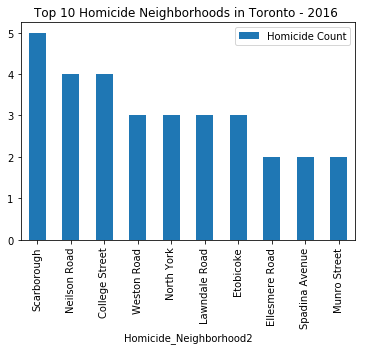

In [15]:
homicide_hood_bar_top10 .plot(kind='bar')
plt.title('Top 10 Homicide Neighborhoods in Toronto - 2016 ')

In [17]:
#Group homicide records by postal areas
homicide_postal =homicide_data.groupby("Homicide_Postal_Group")
homicide_postal_count = homicide_postal["Homicide_Postal_Group"].count()
#homicide_rate = homicide_count/75
#homicide_hm = pd.DataFrame({"Homicide Count":homicide_count, "Homocide Rate": homicide_rate})
homicide_postal_bar = pd.DataFrame({"Homicide Count":homicide_postal_count})
homicide_postal_bar_sort=homicide_postal_bar.sort_values("Homicide Count",ascending=False)
homicide_postal_bar_top10 = homicide_postal_bar_sort.iloc[0:10]
homicide_postal_bar_top10 


,Homicide Count
Homicide_Postal_Group,
M5T,5
M9N,5
M9V,4
M1B,4
M5A,3
M4Y,3
M6K,3
M4J,3
M4M,3


Text(0.5, 1.0, 'Top 10 Homicide Areas in Toronto - 2016 ')

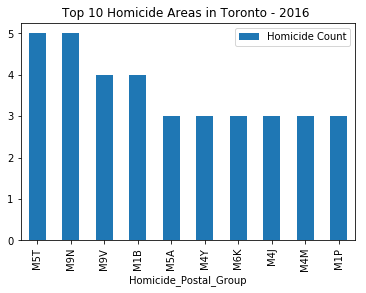

In [18]:
homicide_postal_bar_top10.plot(kind='bar')
plt.title('Top 10 Homicide Areas in Toronto - 2016 ')


In [19]:
locations_homicide = homicide_data[["Homicide_Lat", "Homicide_Lng"]].astype(float)
print(locations_homicide)

     Homicide_Lat  Homicide_Lng
658     43.667374    -79.381638
662     43.705143    -79.529404
666     43.742729    -79.540337
670     43.704571    -79.396797
674     43.657211    -79.404076
678     43.657211    -79.404076
682     43.649132    -79.437943
685     43.708019    -79.341385
780     43.737808    -79.520134
783     43.650467    -79.371910
785     43.752975    -79.258072
788     43.669415    -79.382492
791     43.677151    -79.334877
794     43.657307    -79.373459
797     43.666161    -79.352913
800     43.641914    -79.412705
803     43.739586    -79.222824
806     43.739586    -79.222824
809     43.739586    -79.222824
812     43.660065    -79.352310
867     43.637348    -79.425339
868     43.768520    -79.500557
869     43.774399    -79.253548
870     43.670212    -79.457031
871     43.734100    -79.609917
873     43.700603    -79.517792
875     43.747040    -79.600159
877     43.699532    -79.556374
879     43.764053    -79.205627
881     43.655464    -79.412613
..      

In [20]:
# Create a homicide Heatmap layer
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure()

#homicide_heat_layer = gmaps.heatmap_layer(locations_homicide,dissipating=False, max_intensity=100,
                                 #point_radius = 1)
homicide_heat_layer = gmaps.heatmap_layer(locations_homicide)
fig.add_layer(homicide_heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
# Assign the marker layer to a variable
figure_layout = {
    'width': '400px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
markers = gmaps.marker_layer(locations_homicide)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))